In [247]:
import pandas as pd
import numpy as np

In [248]:
df = pd.read_csv('Data/dirty_cafe_sales.csv')


In [249]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [250]:
df = df.replace(['ERROR', 'UNKNOWN'], np.nan)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,NaN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [251]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [252]:
# Remove duplicates
before = len(df)
df = df.drop_duplicates()
print(f"   - Duplicates removed: {before - len(df)}")

   - Duplicates removed: 0


In [253]:
# Convert to numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [254]:
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

In [255]:
df.shape

(10000, 8)

In [256]:
# Drop rows with critical missing data
before = len(df)
df = df.dropna(subset=['Transaction Date', 'Item'])
print(f"   - Invalid dates/items dropped: {before - len(df)}")

   - Invalid dates/items dropped: 1387


In [257]:
df.shape

(8613, 8)

In [258]:
df['Price Per Unit'].isna().sum()

455

In [259]:
# Item-specific price imputation
df['Price Per Unit'] = df.groupby('Item')['Price Per Unit'].transform(
    lambda x: x.fillna(x.mean())
)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,NaN,2023-10-20
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,NaN,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [260]:
df['Price Per Unit'].isna().sum()

0

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8613 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8613 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          8215 non-null   float64       
 3   Price Per Unit    8613 non-null   float64       
 4   Total Spent       8186 non-null   float64       
 5   Payment Method    5885 non-null   object        
 6   Location          5190 non-null   object        
 7   Transaction Date  8613 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 605.6+ KB


In [262]:
# Fill remaining nulls
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())

df['Payment Method'] = df['Payment Method'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8613 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8613 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          8613 non-null   float64       
 3   Price Per Unit    8613 non-null   float64       
 4   Total Spent       8613 non-null   float64       
 5   Payment Method    8613 non-null   object        
 6   Location          8613 non-null   object        
 7   Transaction Date  8613 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 605.6+ KB


FEATURE TRANSFORMATION

In [264]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [265]:
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [266]:
# Encode categoricals
le_payment = LabelEncoder()
le_location = LabelEncoder()
le_item = LabelEncoder()

df['Payment_Encoded'] = le_payment.fit_transform(df['Payment Method'])
df['Location_Encoded'] = le_location.fit_transform(df['Location'])
df['Item_Encoded'] = le_item.fit_transform(df['Item'])
print(f"   - Encoded: Payment ({len(le_payment.classes_)}), Location ({len(le_location.classes_)}), Item ({len(le_item.classes_)})")
df.head()


   - Encoded: Payment (4), Location (3), Item (8)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Payment_Encoded,Location_Encoded,Item_Encoded
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,1,1,1
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0,0,0
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,1,0,2
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,3,2,4
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2,0,1


![Alt text](download.png)

In [267]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Quantity', 'Price Per Unit', 'Total Spent']])
df['Quantity_Scaled'] = scaled[:, 0]
df['Price_Scaled'] = scaled[:, 1]
df['Total_Scaled'] = scaled[:, 2]
print(f"   - Scaled: 3 numeric features\n")
df.head()


   - Scaled: 3 numeric features



,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Payment_Encoded,Location_Encoded,Item_Encoded,Quantity_Scaled,Price_Scaled,Total_Scaled
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,1,1,1,-0.738947,-0.744852,-0.831022
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0,0,0,0.701975,0.037467,0.531502
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,1,0,2,0.701975,-1.527171,-0.149760
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,3,2,4,-0.738947,1.602106,0.190871
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2,0,1,-0.738947,-0.744852,-0.831022


In [268]:
df.shape

(8613, 14)

In [269]:
print("3. Dimensionality Reduction:")

selected = ['Transaction ID', 'Item',
            'Transaction Date', 'Payment_Encoded', 
            'Location_Encoded', 'Item_Encoded', 'Quantity_Scaled', 'Price_Scaled', 
            'Total_Scaled']
df2 = df[selected]
print(f"   - Selected {len(selected)} columns\n")

3. Dimensionality Reduction:
   - Selected 9 columns



In [ ]:
df2['Spending_Category'] = pd.cut(df['Total Spent'],
                                   bins=[0, 10, 25, 50, float('inf')],
                                   labels=['Low', 'Medium', 'High', 'Very High'])




C:\Users\hanae\AppData\Local\Temp\ipykernel_20700\1112791027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Spending_Category'] = pd.cut(df['Total Spent'], bins=[0, 10, 25, 50, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])


In [273]:
df2['Quantity_Category'] = pd.cut(df['Quantity'], 
                                bins=[0, 1, 3, 5, float('inf')],
                                labels=['Single', 'Few', 'Several', 'Many'])
print(f"   - Created: Spending_Category, Quantity_Category\n")




   - Created: Spending_Category, Quantity_Category



C:\Users\hanae\AppData\Local\Temp\ipykernel_20700\1369683054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quantity_Category'] = pd.cut(df['Quantity'],


In [274]:
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent', 
                'Payment_Encoded', 'Location_Encoded', 'Item_Encoded']

In [275]:
corr_matrix = df[numeric_cols].corr()


In [277]:
%%capture
!pip install seaborn matplotlib

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

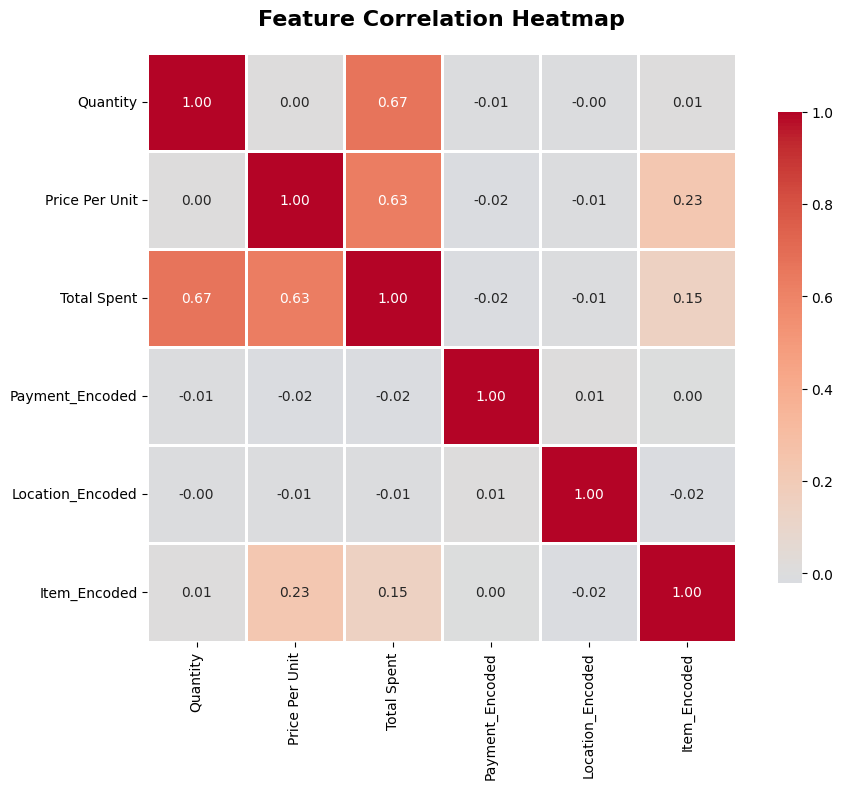

In [281]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
